# Scrap My Prop

### Laboratórios de Engenharia Informática

**"Development of an IT solution for the extraction and automatic analysis of data and relevant information for the calculation of land and properties."**

## Importar Bibliotecas Python

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.debugger import set_trace
import geopy.distance
import os.path
from sklearn import metrics

# 'Imovirtual'

## Ler Dados do CSV

**Junção dos datasets através do 'id'**

In [2]:
k = True

for mes in range(4,6):
    if mes > 0 and mes < 10:
        mes = str(mes).zfill(2)
    print("------ Mês:", mes)
    for dia in range(1,31):
        if dia > 0 and dia < 10:
            dia = str(dia).zfill(2)
        print("--- Dia:", dia)
        if os.path.isfile(f'../dados/dados_imovirtual_{dia}_{mes}.csv'):
            if k:
                data_imo = pd.read_csv(f'../dados/dados_imovirtual_{dia}_{mes}.csv', engine='python', encoding='utf8')
                print(data_imo.shape)
                k = False
            else:
                csv = pd.read_csv(f'../dados/dados_imovirtual_{dia}_{mes}.csv', engine='python', encoding='utf8')
                data_imo = data_imo.append(csv,sort=False)
                data_imo = data_imo.drop_duplicates(subset='Id', keep="last")
                data_imo.index = np.arange(1, len(data_imo) + 1)
                print(data_imo.shape)

------ Mês: 04
--- Dia: 01
--- Dia: 02
--- Dia: 03
--- Dia: 04
--- Dia: 05
--- Dia: 06
--- Dia: 07
--- Dia: 08
--- Dia: 09
--- Dia: 10
--- Dia: 11
--- Dia: 12
--- Dia: 13
--- Dia: 14
--- Dia: 15
(5618, 132)
--- Dia: 16
(5684, 132)
--- Dia: 17
(5712, 132)
--- Dia: 18
(5740, 132)
--- Dia: 19
(5742, 132)
--- Dia: 20
(5755, 132)
--- Dia: 21
(5758, 132)
--- Dia: 22
(5796, 132)
--- Dia: 23
(5803, 132)
--- Dia: 24
(5827, 132)
--- Dia: 25
(5874, 132)
--- Dia: 26
(5877, 132)
--- Dia: 27
(5880, 132)
--- Dia: 28
--- Dia: 29
--- Dia: 30
------ Mês: 05
--- Dia: 01
--- Dia: 02
--- Dia: 03
--- Dia: 04
--- Dia: 05
--- Dia: 06
--- Dia: 07
--- Dia: 08
--- Dia: 09
(6160, 132)
--- Dia: 10
(6160, 132)
--- Dia: 11
(6162, 132)
--- Dia: 12
(6195, 132)
--- Dia: 13
(6222, 132)
--- Dia: 14
(6252, 132)
--- Dia: 15
(6289, 132)
--- Dia: 16
(6372, 132)
--- Dia: 17
(6373, 132)
--- Dia: 18
(6383, 132)
--- Dia: 19
(6437, 132)
--- Dia: 20
(6453, 132)
--- Dia: 21
--- Dia: 22
(6513, 132)
--- Dia: 23
(6532, 132)
--- Dia: 2

In [3]:
#data_imo = pd.read_csv('../dados/dados_imovirtual_08_05.csv', engine='python', encoding='utf8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
data_imo.head()

,Nome,Id,Tipo de imóvel,Preço,Preço m/2,Distrito,Concelho,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,Área bruta m/2,Ano construção,Certificado energético,Armário,Cozinha equipada,Garagem box,Gás canalizado,Lareira,Marquise,Suite,Varanda,Vista de cidade,Condição,Despensa,Arrecadação,Porta blindada,Video Porteiro,Empreendimento,Ar condicionado,Elevador,Estores elétricos,Fibra ótica,Pré-instalação de ar condicionado,Terraço,Área de terreno m/2,Churrasco,Árvores de fruto,Sotão,Cave,Jardim,Aquecimento central,Caldeira,Acessibilidade a pessoas com mobilidade condicionada,Box 2 carros,Detetor de gás,Painéis solares,Recuperação de calor,Vista de campo/serra,Box 1 carro,Portaria,Estacionamento,Piso radiante,Som ambiente,Aspiração central,Finalidade,Tipo de terreno,Acesso pavimentado,Asfaltado,Iluminação pública,Zona arborizada,Declive,Ruína,Alarme,Furo de água,Domótica,Casa das máquinas,Condomínio Fechado,Parque infantil,Piscina,Piscina Privada,Termoacumulador,Garagem exterior,Mobilado,Hidromassagem/jacuzzi,Quintal/horta,Ginásio,Kitchenette,Vigilância/segurança,Campo de ténis,Segurança 24 horas,Vedação,Parqueamento (1 carro),Ligação a rede de água,Ligação a rede de saneamento,Ligação a rede elétrica,Animais permitidos,Parqueamento (2 carros),Cofre,Vista de rio,Nº divisões,Tipo,Pisos,Com WC,Montra,Anexo habitacional,Detetor de incêndio,Detetor de Inundução,Vista de cidade.1,Área (m/2),Vista de mar,Jacuzzi,Património classificado,Adaptada a mobilidade reduzida,Com cozinha,Imóvel de banca,Vista de lago,Fossa séptica,Licensa de construção,Acesso a veículos pesados,Área administrativa,Copa,Recepção,Refeitório,Sala de reuniões,Área florestal,Hidromassagem,Percurso de água,Armazém,Vista de Serra,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Sótão,Paisagem protegida
1,Loja comercial Junto ao Centro da Cidade de Br...,14804552.0,Loja,19 900,622,Braga (distrito),Braga,Sequeira,Rua Inácio José Peixoto,41.554660,-8.432971,NaN,NaN,32 m²,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Loja,1.0,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Excelente Terreno em Fradelos, Braga",14976693.0,Terreno,97 000,60,Braga (distrito),Braga,Vilaça e Fradelos,NaN,41.507746,-8.477455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rústico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Moradia Terrea em Lomar,15377577.0,Moradia,NaN,NaN,Braga (distrito),Braga,Lomar e Arcos,Rua Quinta das Mouras - Lomar,41.527420,-8.423300,T4,4 ou mais,537 m²,2 448 m²,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Moradia p/ Restauro - Maximinos,14698254.0,Moradia,149 500,1 495,Braga (distrito),Braga,"Braga (Maximinos, Sé e Cividade)",NaN,41.549550,-8.437720,T0,NaN,100 m²,131 m²,1980.0,NaN,NaN,NaN,NaN,Na

## Pré-processamento comum a todo o Dataset

**Funções auxiliares**

In [4]:
def toNumeric(string):
    res = str(string)
    res = res.replace(" ", "")
    res = res.replace(",", ".")
    res = float(pd.to_numeric(res, errors='ignore')) # tem que ser float porque esse tipo consegue interpretar o np.nan
    return res

**Colunas 'Distrito' e 'Concelho': Retirar colunas de forma total porque já era uma pré-condição do projeto, mas primeiro verificar se, de facto, todos os campos estão preenchidos com 'Braga';**

In [5]:
print("Distritos existentes:", data_imo['Distrito'].unique())
print("Concelhos existentes:", data_imo['Concelho'].unique())

Distritos existentes: ['Braga (distrito)' nan]
Concelhos existentes: ['Braga' nan]


In [6]:
if 'Distrito' in data_imo.columns:
    data_imo = data_imo.drop(['Distrito'], axis = 1) 
if 'Concelho' in data_imo.columns:
    data_imo = data_imo.drop(['Concelho'], axis = 1) 

**Coluna 'Nome': Não é característica dos imóveis mas sim identificador, portanto não deve entrar nos cálculos (Drop);**

In [7]:
if 'Nome' in data_imo.columns:
    data_imo = data_imo.drop(['Nome'], axis = 1) 

**Coluna 'Id': Drop linhas sem 'Id'; float -> int;**

In [8]:
data_imo = data_imo.dropna(subset=['Id'])
data_imo.index = np.arange(1, len(data_imo) + 1)

In [9]:
data_imo['Id'] = data_imo['Id'].astype(int)

**Dar join a colunas que, apesar de aparentarem ter nomes diferentes, representam o mesmo**

**Exemplo: Valores de 'Box 1 carro' e 'Box 2 carros' -> 'Garagem box'; Valores de 'Parqueamento (1 carro)' e 'Parqueamento (2 carros)' -> 'Estacionamento'; Valores de 'Hidromassagem' e 'Jacuzzi' -> 'Hidromassagem/jacuzzi'; ...**

**Fazer o mesmo com piscina e piscina privada???**

In [10]:
#pd.set_option('display.max_columns', None)
#data_imo.columns.to_numpy()

In [11]:
for index,val in data_imo['Vista de cidade.1'].items():
    if (val==True):
        data_imo['Vista de cidade'].iloc[index] = True
for index,val in data_imo['Sótão'].items():
    if (val==True):
        data_imo['Sotão'].iloc[index] = True
for index,val in data_imo['Vista de Serra'].items():
    if (val==True):
        data_imo['Vista de campo/serra'].iloc[index] = True
for index,val in data_imo['Adaptada a mobilidade reduzida'].items():
    if (val==True):
        data_imo['Adaptado a mobilidade reduzida'].iloc[index] = True
for index,val in data_imo['Box 1 carro'].items():
    if (val==True):
        data_imo['Garagem box'].iloc[index] = True
for index,val in data_imo['Box 2 carros'].items():
    if (val==True):
        data_imo['Garagem box'].iloc[index] = True
for index,val in data_imo['Parqueamento (1 carro)'].items():
    if (val==True):
        data_imo['Estacionamento'].iloc[index] = True
for index,val in data_imo['Parqueamento (2 carros)'].items():
    if (val==True):
        data_imo['Estacionamento'].iloc[index] = True
for index,val in data_imo['Hidromassagem'].items():
    if (val==True):
        data_imo['Hidromassagem/jacuzzi'].iloc[index] = True
for index,val in data_imo['Jacuzzi'].items():
    if (val==True):
        data_imo['Hidromassagem/jacuzzi'].iloc[index] = True
        
data_imo=data_imo.drop(['Vista de cidade.1', 'Sótão', 'Vista de Serra', 'Hidromassagem', 'Jacuzzi', 'Adaptada a mobilidade reduzida'], axis=1)


C:\Users\Rui\Anaconda3\envs\LEI\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
#data_imo.info(verbose=True, null_counts=True)

**Normalizar os valores de todas as áreas; Transformar em dado numérico;**

In [13]:
for column in data_imo.columns:
    if "Área" in column and "Área administrativa" not in column and "Área florestal" not in column:
        for i in range(len(data_imo[column])):
            if not pd.isnull(data_imo[column].iloc[i]):
                #print(data_imo[column].iloc[i])
                data_imo[column].iloc[i]=toNumeric(str(data_imo[column].iloc[i])[0:-3])
                #print(data_imo[column].iloc[i])
                #print(type(data_imo[column].iloc[i]))

**Coluna 'Preço' e 'Preço m/2': Drop dos imóveis com valor 'nan'; Transformar em dado numérico;**

In [14]:
data_imo['Preço'] = data_imo['Preço'].apply(toNumeric)

nan_prices = data_imo['Preço'].index[data_imo['Preço'].apply(np.isnan)]
data_imo = data_imo.drop(nan_prices)
data_imo.index = np.arange(1, len(data_imo) + 1)

data_imo['Preço'] = data_imo['Preço'].apply(int)

# ------

data_imo['Preço m/2'] = data_imo['Preço m/2'].apply(toNumeric)

nan_prices = data_imo['Preço m/2'].index[data_imo['Preço m/2'].apply(np.isnan)]
data_imo = data_imo.drop(nan_prices)
data_imo.index = np.arange(1, len(data_imo) + 1)

data_imo['Preço m/2'] = data_imo['Preço m/2'].apply(int)

In [15]:
data_imo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6567 entries, 1 to 6567
Data columns (total 123 columns):
 #   Column                                                Dtype  
---  ------                                                -----  
 0   Id                                                    int32  
 1   Tipo de imóvel                                        object 
 2   Preço                                                 int64  
 3   Preço m/2                                             int64  
 4   Freguesia                                             object 
 5   Rua                                                   object 
 6   Latitude                                              float64
 7   Longitude                                             float64
 8   Tipologia                                             object 
 9   Nº Casas de Banho                                     object 
 10  Área útil m/2                                         object 
 11  Área bruta m/2  

# Dados - Terrenos

**Ver os valores únicos de cada coluna para proceder ao processamento**

In [ ]:
for col in data_imo.columns:
    uniques=data_imo[col].unique()
    print("Valores únicos para a coluna ", col, ": ", uniques)

**Dividir os dados por tipo de imóvel**

In [17]:
data_imo_terrenos = data_imo.loc[(data_imo['Tipo de imóvel'] == 'Terreno')]
data_imo_terrenos.index = np.arange(1, len(data_imo_terrenos) + 1)

In [18]:
data_imo_terrenos

,Id,Tipo de imóvel,Preço,Preço m/2,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,Área bruta m/2,Ano construção,Certificado energético,Armário,Cozinha equipada,Garagem box,Gás canalizado,Lareira,Marquise,Suite,Varanda,Vista de cidade,Condição,Despensa,Arrecadação,Porta blindada,Video Porteiro,Empreendimento,Ar condicionado,Elevador,Estores elétricos,Fibra ótica,Pré-instalação de ar condicionado,Terraço,Área de terreno m/2,Churrasco,Árvores de fruto,Sotão,Cave,Jardim,Aquecimento central,Caldeira,Acessibilidade a pessoas com mobilidade condicionada,Box 2 carros,Detetor de gás,Painéis solares,Recuperação de calor,Vista de campo/serra,Box 1 carro,Portaria,Estacionamento,Piso radiante,Som ambiente,Aspiração central,Finalidade,Tipo de terreno,Acesso pavimentado,Asfaltado,Iluminação pública,Zona arborizada,Declive,Ruína,Alarme,Furo de água,Domótica,Casa das máquinas,Condomínio Fechado,Parque infantil,Piscina,Piscina Privada,Termoacumulador,Garagem exterior,Mobilado,Hidromassagem/jacuzzi,Quintal/horta,Ginásio,Kitchenette,Vigilância/segurança,Campo de ténis,Segurança 24 horas,Vedação,Parqueamento (1 carro),Ligação a rede de água,Ligação a rede de saneamento,Ligação a rede elétrica,Animais permitidos,Parqueamento (2 carros),Cofre,Vista de rio,Nº divisões,Tipo,Pisos,Com WC,Montra,Anexo habitacional,Detetor de incêndio,Detetor de Inundução,Área (m/2),Vista de mar,Património classificado,Com cozinha,Imóvel de banca,Vista de lago,Fossa séptica,Licensa de construção,Acesso a veículos pesados,Área administrativa,Copa,Recepção,Refeitório,Sala de reuniões,Área florestal,Percurso de água,Armazém,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Paisagem protegida
1,14976693,Terreno,97000,60,Vilaça e Fradelos,NaN,41.507746,-8.477455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rústico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15359785,Terreno,40000,67,Cabreiros e Passos (São Julião),NaN,41.535870,-8.490450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15029241,Terreno,40000,152,Palmeira,NaN,41.583332,-8.433333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15029240,Terreno,50000,96,Palmeira,NaN,41.583332,-8.433333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15022668,Terreno,99700,217,Nogueiró e Tenões,NaN,41.553929,-8.399637,NaN,NaN,NaN,NaN,NaN,NaN,N

In [19]:
#data_imo_terrenos.info(verbose=True, null_counts=True)

## Análise exploratória de dados

*Distribuição da feature 'Preço'*

Text(0.5, 0, 'Preço')

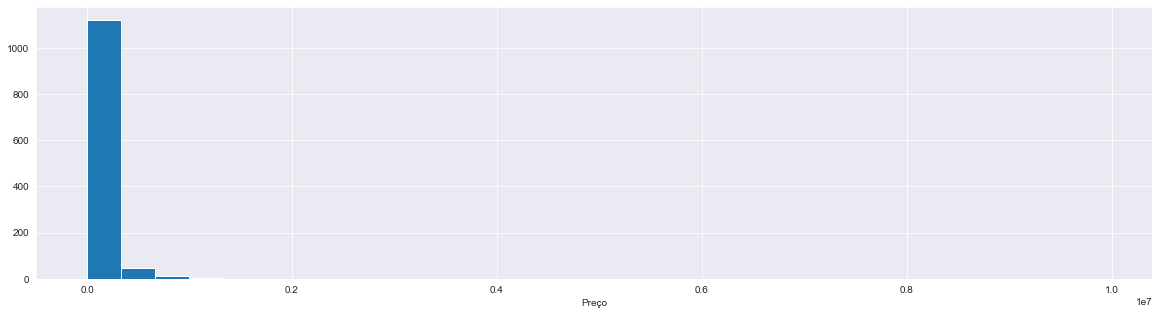

In [20]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
data_imo_terrenos['Preço'].hist(bins=30)
plt.xlabel('Preço')

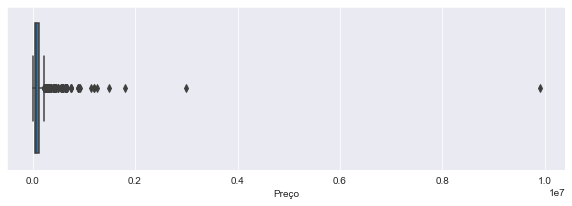

In [21]:
fig = plt.figure(figsize = (10,3))
sns.boxplot(x=data_imo_terrenos['Preço'])

*Distribuição da feature 'Preço' - Outliers visuais*

In [22]:
a_excluir = data_imo_terrenos[(data_imo_terrenos['Preço'] >= 1000000)]
#a_excluir = data_imo_terrenos[(data_imo_terrenos['Preço'] >= 400000) | (data_imo_terrenos['Preço'] <= 150000)]
data_imo_terrenos = data_imo_terrenos.drop(a_excluir.index)
data_imo_terrenos.index = np.arange(1, len(data_imo_terrenos) + 1)
a_excluir

,Id,Tipo de imóvel,Preço,Preço m/2,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,Área bruta m/2,Ano construção,Certificado energético,Armário,Cozinha equipada,Garagem box,Gás canalizado,Lareira,Marquise,Suite,Varanda,Vista de cidade,Condição,Despensa,Arrecadação,Porta blindada,Video Porteiro,Empreendimento,Ar condicionado,Elevador,Estores elétricos,Fibra ótica,Pré-instalação de ar condicionado,Terraço,Área de terreno m/2,Churrasco,Árvores de fruto,Sotão,Cave,Jardim,Aquecimento central,Caldeira,Acessibilidade a pessoas com mobilidade condicionada,Box 2 carros,Detetor de gás,Painéis solares,Recuperação de calor,Vista de campo/serra,Box 1 carro,Portaria,Estacionamento,Piso radiante,Som ambiente,Aspiração central,Finalidade,Tipo de terreno,Acesso pavimentado,Asfaltado,Iluminação pública,Zona arborizada,Declive,Ruína,Alarme,Furo de água,Domótica,Casa das máquinas,Condomínio Fechado,Parque infantil,Piscina,Piscina Privada,Termoacumulador,Garagem exterior,Mobilado,Hidromassagem/jacuzzi,Quintal/horta,Ginásio,Kitchenette,Vigilância/segurança,Campo de ténis,Segurança 24 horas,Vedação,Parqueamento (1 carro),Ligação a rede de água,Ligação a rede de saneamento,Ligação a rede elétrica,Animais permitidos,Parqueamento (2 carros),Cofre,Vista de rio,Nº divisões,Tipo,Pisos,Com WC,Montra,Anexo habitacional,Detetor de incêndio,Detetor de Inundução,Área (m/2),Vista de mar,Património classificado,Com cozinha,Imóvel de banca,Vista de lago,Fossa séptica,Licensa de construção,Acesso a veículos pesados,Área administrativa,Copa,Recepção,Refeitório,Sala de reuniões,Área florestal,Percurso de água,Armazém,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Paisagem protegida
14,15052443,Terreno,9900000,300,São Vicente,NaN,41.490280,-8.441130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Habitação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,14777130,Terreno,3000000,63,Palmeira,Rua das Flores,41.595200,-8.434873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,11784208,Terreno,1800000,80,Nogueiró e Tenões,Largo do Santuário do Bom Jesus,41.545030,-8.399415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Habitação,Urbano,NaN,NaN,NaN,NaN,Plano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
1022,12017191,Terreno,1200000,669,São Victor,NaN,41.564188,-8.405681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Urbano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,6576684,Terreno,1500000,1000,"Braga

*Relação entre o Preço e outras variáveis*

Text(0, 0.5, 'Preço')

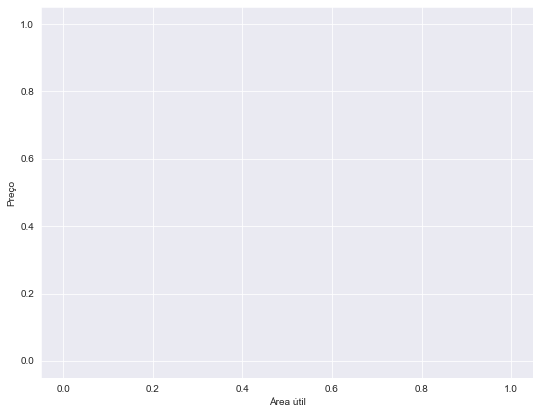

In [24]:
fig = plt.figure(figsize = (30,15))

ax1 = fig.add_subplot(2,3,1)
ax1.scatter(data_imo_terrenos['Área útil m/2'], data_imo_terrenos['Preço'])
ax1.set_xlabel('Área útil')
ax1.set_ylabel('Preço')

*Relacionamento do 'Preço' com outras features categóricas importantes*

In [ ]:
cat_data = data_imo_terrenos[['Freguesia']]

In [ ]:
for cat in cat_data.dtypes[:10].index.values:
    plt.figure(figsize=(20, 8))
    plt.xticks(rotation=90)
    sns.boxplot(x=cat, y='Preço', data=data_imo_terrenos) 
    sns.swarmplot(x=cat, y='Preço', data=data_imo_terrenos)
    plt.show()

**Remoção de Outliers (Quantos eliminar?)**

*Através da visualização dos gráficos*

In [ ]:
outliers = data_imo_terrenos.loc[data_imo_terrenos['Preço'] > 2000000].index
data_imo_terrenos = data_imo_terrenos.drop(outliers)
data_imo_terrenos.index = np.arange(1, len(data_imo_terrenos) + 1)
data_imo_terrenos.shape

*Através de métodos matemáticos*

In [ ]:
z = np.abs(stats.zscore(data_imo_terrenos[['Preço']]))
threshold = 2
print(np.where(z > threshold))
# The first array contains the list of row numbers and second array respective column numbers

In [ ]:
# Só fazer 1 vez
data_imo_terrenos = data_imo_terrenos[(np.abs(stats.zscore(data_imo_terrenos[['Preço']])) < 2).all(axis=1)]
data_imo_terrenos.index = np.arange(1, len(data_imo_terrenos) + 1)
data_imo_terrenos

**Análise exploratória dos dados sem outliers**

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
data_imo_terrenos['Preço'].hist(bins=30)
plt.xlabel('Preço')

In [ ]:
fig = plt.figure(figsize = (30,15))

ax1 = fig.add_subplot(2,3,1)
ax1.scatter(data_imo_terrenos['Área útil m/2'], data_imo_terrenos['Preço'])
ax1.set_xlabel('Área útil')
ax1.set_ylabel('Preço')

**Dados em falta por coluna**

In [25]:
pd.set_option('display.max_rows', None)
percent_missing = data_imo_terrenos.isnull().sum() * 100 / len(data_imo_terrenos)
missing_value_data_imo_terrenos_columns = pd.DataFrame({'percent_missing (%)': percent_missing})
sort_data = missing_value_data_imo_terrenos_columns.copy()
sort_data.sort_values('percent_missing (%)', inplace=True, ascending=False)
sort_data

,percent_missing (%)
Paisagem protegida,100.000000
Box 1 carro,100.000000
Vigilância/segurança,100.000000
Kitchenette,100.000000
Ginásio,100.000000
Quintal/horta,100.000000
Mobilado,100.000000
Garagem exterior,100.000000
Termoacumulador,100.000000
Piscina Privada,100.000000


In [ ]:
pd.set_option('display.max_rows', 10)

**Remover colunas que tenham mais de 30% (?) de missing values**

In [ ]:
a_manter = list(missing_value_data_imo_terrenos_columns.index[missing_value_data_imo_terrenos_columns['percent_missing (%)'] < 30])
data_imo_terrenos = data_imo_terrenos[a_manter]
data_imo_terrenos

**Dados em falta por linha**

In [ ]:
percent_missing = (1 - data_imo_terrenos.apply(lambda x: x.count(), axis=1) / len(data_imo_terrenos.columns)) * 100
missing_value_data_imo_terrenos_rows = pd.DataFrame({'percent_missing (%)': percent_missing})
sort_data = missing_value_data_imo_terrenos_rows.copy()
sort_data.sort_values('percent_missing (%)', inplace=True, ascending=False)
sort_data

**Remover linhas com percentagem de dados em falta superior a 50%**

In [ ]:
a_excluir = missing_value_data_imo_terrenos_rows[(missing_value_data_imo_terrenos_rows['percent_missing (%)'] >= 50)]
data_imo_terrenos = data_imo_terrenos.drop(a_excluir.index)
data_imo_terrenos.index = np.arange(1, len(data_imo_terrenos) + 1)

**Inserir dados em falta**

In [ ]:
for x in data_imo_terrenos.select_dtypes(include=['float64']).columns.tolist():
    median_value=data_imo_terrenos[x].median()
    data_imo_terrenos[x]=data_imo_terrenos[x].fillna(median_value)

for y in data_imo_terrenos.select_dtypes(include=['object']).columns.tolist():
    mode_value=data_imo_terrenos[y].mode()
    data_imo_terrenos[y]=data_imo_terrenos[y].fillna(mode_value[0])    
    
data_imo_terrenos

In [ ]:
sns.heatmap(data_imo_terrenos.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Estruturação dos Dados

## Inserção de dados acerca da localização do imóvel

*www.google.com/maps/*

**Funções auxiliares**

In [ ]:
def distance_coordinates(lat1,lon1,lat2,lon2):
    
    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)
    
    res = geopy.distance.geodesic(coords_1, coords_2).km

    return round(res,3)

def minDist(data_imo, values):
    distancias = []
    for index, row in data_imo.iterrows():
        min_dist = 99999999.9
        for value in values.values():
            dist = distance_coordinates(data_imo_terrenos.iloc[index-1]['Latitude'],data_imo_terrenos.iloc[index-1]['Longitude'],value[0],value[1])
            if dist < min_dist:
                min_dist = dist    
        distancias.append(min_dist)
    return distancias

**Centro da Cidade**

In [ ]:
centro_cidade = {}
centro_cidade['Centro'] = 41.5514083,-8.4230248

In [ ]:
data_imo_terrenos['Centro Cidade (km)'] = minDist(data_imo_terrenos, centro_cidade)

**Hospitais**

In [ ]:
hospitais = {}
hospitais['Hospital de Braga'] = 41.5679738,-8.3990116
hospitais['Trofa Saúde - Braga Sul'] = 41.5246625,-8.4141593
hospitais['Trofa Saúde - Braga Centro'] = 41.5498965,-8.4187538
hospitais['Lusíadas Braga'] = 41.5476764,-8.4224197

In [ ]:
data_imo_terrenos['Hospitais (km)'] = minDist(data_imo_terrenos, hospitais)

**Centros de Saúde**

In [ ]:
centros_saude = {}
centros_saude['Braga Centro'] = 41.5471857,-8.4279198
centros_saude['Infias'] = 41.5602432,-8.4228005
centros_saude['USF do Minho'] = 41.5465815,-8.4147386
centros_saude['Clinica de Sao Marcos'] = 41.5454486,-8.426507
centros_saude['O Poverello'] = 41.5703584,-8.4114745
centros_saude['Clinica Cubana Braga'] = 41.5492599,-8.4262347
centros_saude['Clinica Médico - Cirurgica De Santa Tecla'] = 41.5489178,-8.4117642
centros_saude['Hemoatlantico - Braga'] = 41.5459355,-8.4314237
centros_saude['Centro de Vacinação Internacional'] = 41.5586578,-8.3999608
centros_saude['Clinica Enguardas'] = 41.5571581,-8.4127898
centros_saude['USF Braga Norte'] = 41.5603489,-8.4227264
centros_saude['USF Carandá'] = 41.5525337,-8.4123
centros_saude['USF Bracara Augusta'] = 41.5422297,-8.4105532
centros_saude['USF Maxisaúde'] = 41.5473324,-8.4279983
centros_saude['USF São Lourenço'] = 41.5142651,-8.4559502
centros_saude['USF São João de Braga'] = 41.5463782,-8.4145564
centros_saude['USF Manuel Rocha Peixoto'] = 41.5473003,-8.4279339
centros_saude['USF Gualtar'] = 41.5682764,-8.3871645
centros_saude['USF Saúde Oeste'] = 41.5325817,-8.4733681
centros_saude['USF Tadim'] = 41.5079792,-8.4879975
centros_saude['Gualtar'] = 41.5683003,-8.3872187
centros_saude['USF Esporões'] = 41.5120606,-8.4201814
centros_saude['USF Salutis'] = 41.5465247,-8.4147014
centros_saude['USP de Braga'] = 41.5588888,-8.3998833

In [ ]:
data_imo_terrenos['Centros Saúde (km)'] = minDist(data_imo_terrenos, centros_saude)

**Centros Comerciais**

In [ ]:
centroscomerciais = {}
centroscomerciais['Braga Parque'] = 41.5577669,-8.4060603
centroscomerciais['Minho Center'] = 41.540935,-8.400464
centroscomerciais['Nova Arcada'] = 41.579068,-8.429654

In [ ]:
data_imo_terrenos['Centro Comerciais (km)'] = minDist(data_imo_terrenos, centroscomerciais)

**Escolas**

In [ ]:
escolas = {}
escolas['Secundária Sá de Miranda'] = 41.5568137,-8.4182525
escolas['Básica Francisco Sanches'] = 41.5548131,-8.4118978
escolas['Básica de Gualtar'] = 41.5669867,-8.38796
escolas['Básica de Lamaçães'] = 41.5471216,-8.4016327
escolas['Secundária Carlos Amarante'] = 41.5509961,-8.413909
escolas['Básica de Palmeira'] = 41.5771831,-8.4245399
escolas['Secundária de Maximinos'] = 41.5424538,-8.4415713
escolas['Básica André Soares'] = 41.5470115,-8.415924
escolas['Básica do 1º Ciclo de São Vitor'] = 41.55186,-8.4129202
escolas['Básica de Real'] = 41.5577824,-8.4395854
escolas['Jardim Escola João de Deus'] = 41.5447436,-8.407904
escolas['Colégio Luso Internacional de Braga'] = 41.56979,-8.3885487
escolas['EB1 Quinta da Veiga'] = 41.5590263,-8.4239226
escolas['Secundária D. Maria II'] = 41.5487484,-8.4177364
escolas['Básica Bairro da Misericórdia'] = 41.5578043,-8.4262862
escolas['EB1 Carandá'] = 41.5452545,-8.4156397
escolas['Colégio Dom Diogo de Sousa'] = 41.5575,-8.415931
escolas['Centro Escolar Ponte Pedrinha'] = 41.5403601,-8.4294783
escolas['EB1/J1 Bairro da Alegria'] = 41.5638599,-8.402921

In [ ]:
data_imo_terrenos['Escolas (km)'] = minDist(data_imo_terrenos, escolas)

**Universidades**

In [ ]:
universidades = {}
universidades['Universidade do Minho - Campus de Gualtar'] = 41.5607319,-8.3962368
universidades['IPCA - Pólo de Braga'] = 41.5421121,-8.4210972
universidades['Universidade Católica Portuguesa'] = 41.554852,-8.4209143

In [ ]:
data_imo_terrenos['Universidades (km)'] = minDist(data_imo_terrenos, universidades)

**Estação de Comboios**

In [ ]:
estacao = {}
estacao['Estacao'] = 41.548143,-8.4344431

In [ ]:
data_imo_terrenos['Estação de Comboios (km)'] = minDist(data_imo_terrenos, estacao)

**Parques Industriais**

*www.igogo.pt/parques-industriais-braga/*

In [ ]:
parques_industriais = {}
parques_industriais['Frossos'] = 41.5595545,-8.447319
parques_industriais['Quinta do Carreiro'] = 41.5653531,-8.4454561
parques_industriais['Adaúfe'] = 41.5974779,-8.4135554
parques_industriais['Celeirós'] = 41.5109663,-8.454419
parques_industriais['Marvilha'] = 41.5318363,-8.4735374
parques_industriais['Mire de Tibães'] = 41.5819656,-8.4767172
parques_industriais['Padim da Graça'] = 41.5692605,-8.4890601
parques_industriais['Pitancinhos'] = 41.5840245,-8.4219733
parques_industriais['Vilça'] = 41.5154222,-8.4937553

In [ ]:
data_imo_terrenos['Parques Industriais (km)'] = minDist(data_imo_terrenos, parques_industriais)

**Central de Autocarros**

In [ ]:
central_autocarros = {}
central_autocarros['Central'] = 41.555324,-8.425410

In [ ]:
data_imo_terrenos['Central Autocarros (km)'] = minDist(data_imo_terrenos, central_autocarros)

**Bancos**

In [ ]:
bancos = {}
bancos['BPI Frossos'] = 41.561298,-8.447379
bancos['BPI Gualtar'] = 41.5647823,-8.3876109
bancos['Crédito Agrícola Braga'] = 41.5514726,-8.4278259
bancos['Activo Bank'] = 41.5521836,-8.4267081
bancos['Banif Centro'] = 41.5524396,-8.4236611
bancos['Banco de Portugal'] = 41.5518264,-8.4234077
bancos['Montepio Centro'] = 41.5517009,-8.4180607
bancos['Montepio Centro 2'] = 41.5507289,-8.4250391
bancos['Novo Banco Centro'] = 41.5507776,-8.4238804
bancos['Banco de Investimento Global'] = 41.5495727,-8.4251216
bancos['Novo Banco Centro 2'] = 41.5492902,-8.4121129
bancos['Banco Millenium BCP São Lázaro'] = 41.5475307,-8.4210104
bancos['BBVA São Lázaro'] = 41.5464477,-8.4199778
bancos['Santander Totta Lamaçães'] = 41.5479773,-8.4033012
bancos['Caixa Geral de Depósito Lamaçães'] = 41.5480627,-8.4035902
bancos['BPI Dume'] = 41.5450355,-8.4019862
bancos['Novo Banco Maximinos'] = 41.5448869,-8.4337664
bancos['Caixa Geral de Depósitos Maximinos'] = 41.547196,-8.4338421
bancos['BPI N14'] = 41.53774,-8.434457

In [ ]:
data_imo_terrenos['Bancos (km)'] = minDist(data_imo_terrenos, bancos)

**Correios**

In [ ]:
correios = {}
correios['CTT Maximinos'] = 41.5444322,-8.4340695
correios['CTT São Lázaro'] = 41.544917,-8.420586
correios['CTT Fonte Seca'] = 41.535935,-8.4016483
correios['CTT 25 de Abril'] = 41.5474966,-8.4204056
correios['Estação de Correios de Santa Tecla'] = 41.5484275,-8.4118152
correios['CTT Nogueira, Fraiões e Lamaçães'] = 41.5480095,-8.4040274
correios['Posto de Correios de Braga (São José de Lázaro)'] = 41.5497985,-8.4193059
correios['CTT Largo de São Francisco'] = 41.5518429,-8.423987
correios['CTT Braga Parque'] = 41.556725,-8.4056481
correios['CTT Largo de Infias'] = 41.5579778,-8.4165392

In [ ]:
data_imo_terrenos['Correios (km)'] = minDist(data_imo_terrenos, correios)

**Parques e zonas verdes**

In [ ]:
parques_lazer = {}
parques_lazer['Parque de Lazer de Gerizes'] = 41.5835983,-8.449529
parques_lazer['Parque da Rodovia'] = 41.552828,-8.4031463
parques_lazer['Jardim da Avenida Central'] = 41.551519,-8.421523
parques_lazer['Parque São João da Ponte'] = 41.5454706,-8.4265083
parques_lazer['Parque da Ponte'] = 41.541304, -8.419441
parques_lazer['Parque de Lazer da Rampa da Falperra'] = 41.5309717,-8.3944834
parques_lazer['Parque de Lazer do Ribeiro dos Prados'] = 41.5052344,-8.4422877 

In [ ]:
data_imo_terrenos['Parques e Zonas Verdes (km)'] = minDist(data_imo_terrenos, parques_lazer)

**Serviços Públicos**

*https://eportugal.gov.pt/locais-de-atendimento-de-servicos-publicos/-/pesquisa/search_stores*

In [ ]:
servicos_publicos = {}
servicos_publicos['Finanças 1'] = 41.5498747,-8.4194008
servicos_publicos['Finanças 2'] = 41.5440114,-8.4358346
servicos_publicos['Segurança Social'] = 41.5477731,-8.4129363
servicos_publicos['Serviços de RSI'] = 41.5424794,-8.4360436
servicos_publicos['Gabinete de Atendimento ao Cidadão'] = 41.5561192,-8.4121799
servicos_publicos['Conservatória do Registo Civil'] = 41.5518773,-8.4222603
servicos_publicos['IEFP - Centro de Emprego'] = 41.5423426,-8.4339527
servicos_publicos['SEF - Loja do Cidadão de Braga'] = 41.5474961,-8.421969
servicos_publicos['Espaço Cidadão Sobreposta'] = 41.547783,-8.3619992
servicos_publicos['Espaço Cidadão Adaúfe'] = 41.5861605,-8.3926854
servicos_publicos['Espaço Cidadão Figueiredo'] = 41.5048946,-8.4349509
servicos_publicos['Espaço Cidadão Real'] = 41.5575145,-8.4440584
servicos_publicos['Espaço Cidadão S. Vicente'] = 41.5565553,-8.4241112
servicos_publicos['Espaço Cidadão Sequeira'] = 41.5323623,-8.4732977
servicos_publicos['Espaço Cidadão Tadim'] = 41.5057871,-8.4916939

In [ ]:
data_imo_terrenos['Serviços Públicos (km)'] = minDist(data_imo_terrenos, servicos_publicos)

**Policia Municipal**

In [ ]:
policia = {}
policia['Policia'] = 41.5495054,-8.4267993

In [ ]:
data_imo_terrenos['Policia Municipal (km)'] = minDist(data_imo_terrenos, policia)

**Farmácias**

*https://portalnacional.com.pt/braga/braga/farmacias/*

In [ ]:
farmacias = {}
farmacias['Adaúfe'] = 41.5858796,-8.4020402
farmacias['Alvim - Merelim (São Pedro) e Frossos'] = 41.5595977,8.4479227
farmacias['Araújo Rodrigues - Celeirós'] = 41.5129219,-8.4503908
farmacias['Beatriz - São Vitor'] = 41.5492671,-8.4133199
farmacias['Braga - São Vitor'] = 41.5511534,-8.4064856
farmacias['Brito - São José de São Lázaro e São João do Souto'] = 41.5505688,-8.4228146
farmacias['Carmo - Merelim (São Pedro) e Frossos'] = 41.5716977,-8.45249
farmacias['Central - São José de São Lázaro e São João do Souto'] = 41.551847,-8.4250035
farmacias['Coelho - Maximinos, Sé e Cividade'] = 41.5514527,-8.4280069
farmacias['Cristal - São José de São Lázaro'] = 41.5486228,-8.4216631
farmacias['Santa Casa da Misericórdia - São José de São Lázaro e São João do Souto'] = 41.5490779,-8.4232058
farmacias['Esporões'] = 41.5119635,-8.4203129
farmacias['Gualtar'] = 41.565306,-8.3872187
farmacias['Lamaçães'] = 41.547976,-8.4012761
farmacias['Lomar'] = 41.5307238,-8.427394
farmacias['Henriquina - São Vitor'] = 41.5524657,-8.4139864
farmacias['Lima - São José de São Lázaro e São João do Souto'] = 41.5536114,-8.4235402
farmacias['Loureiro Basto - Palmeira'] = 41.5905331,-8.4295469
farmacias['Marques - São José de São Lázaro e São João do Souto'] = 41.550423,-8.423677
farmacias['Martins - São José de São Lázaro e São João do Souto'] = 41.5510726,-8.4223516
farmacias['Narcisa C. Dias - Veiga do Penso, Escudeiros e Penso'] = 41.4868491,-8.4292978
farmacias['Nova de Nogueira - Nogueira'] = 41.5304337,-8.4102638
farmacias['Nuno Barros - Real'] = 41.554171,-8.438716
farmacias['Oliveira - Ferreiros'] = 41.5345909,-8.4400511
farmacias['Osório - Ruães'] = 41.5808657,-8.4758667
farmacias['Pimenta - Cabreiros'] = 41.5334211,-8.4965154
farmacias['Farmácia Pimentel - Sao Vitor'] = 41.557452,-8.408761
farmacias['Farmácia Pinheiro - Maximinos, Sé e Cividadee'] = 41.5456516,-8.4334375
farmacias['Farmácia Pipa - Nogueira, Fraião e Lamaçães'] = 41.5435379,-8.3995875
farmacias['Farmácia Rodrigues - Maximinos, Sé e Cividade'] = 41.5503813,-8.4287748
farmacias['Farmácia Roma - São José de São Lázaro e São João do Souto'] = 41.5532189,-8.4237785
farmacias['Farmácia Santos - São Vicente'] = 41.5566642,-8.4197066
farmacias['Farmácia Santos da Cunha - Maximinos, Sé e Cividade'] = 41.5417512,-8.4298574
farmacias['Farmácia São João - São José de São Lázaro e São João do Souto'] = 41.5450471,-8.4196004
farmacias['Farmácia Silva - São Vítor'] = 41.551804,-8.4174405
farmacias['Farmácia Sousa Gomes - Maximinos, Sé e Cividade'] = 41.5512345,-8.4288927
farmacias['Farmácia Tebosa - Laião-Tebosa'] = 41.4863814,-8.4758655
farmacias['Farmácia Vidal - Tadim'] = 41.5078378,-8.4869193

In [ ]:
data_imo_terrenos['Farmácias (km)'] = minDist(data_imo_terrenos, farmacias)

**Outliers (Localização do imóvel errada)**

In [ ]:
a_excluir = data_imo_terrenos[(data_imo_terrenos['Centro Cidade (km)'] >= 30)]
data_imo_terrenos = data_imo_terrenos.drop(a_excluir.index)
data_imo_terrenos.index = np.arange(1, len(data_imo_terrenos) + 1)
#a_excluir

## Dataset estruturado

In [ ]:
data_imo_terrenos